# 元となるデータを作る関数たち

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

In [66]:
def cropImage(img, center_x, center_y, height, width):
    left = center_x - width/2
    upper = center_y - height/2
    right = center_x + width/2
    lower = center_y + height/2
    c_img = img.crop((left, upper, right, lower))
    carr = np.asarray(c_img)
    carr = carr.flatten()
    carr = np.asarray(carr).astype(np.float32)
    return np.array(carr, dtype=np.float32)/255

def random_crop(img, DATA_NUM):
    image_list = np.empty(28*28,dtype=np.float32)
    labels = np.empty(2,dtype=np.float32)
    for n in range(DATA_NUM):
        # choice 14 <= x <= 126 && 14 <= y <= 42
        randx = np.random.rand()*112 + 14
        randy = np.random.rand()*28 + 14
        c_image = cropImage(img, int(randx), int(randy), 28, 28)
        image_list = np.vstack((image_list, c_image))
        labels = np.vstack((labels,[randx/(28*5), randy/(25*2)]))
    image_list = np.delete(image_list, 0,axis=0)
    labels = np.delete(labels,0, axis=0)
    return image_list, labels

def dispTrainData(o_img, c_img, label):
    plt.clf()
    img = o_img.copy()
    x = int(label[0]*28*5)
    y = int(label[1]*28*2)
    print(x)
    print(y)
    pixels = (c_img * 256).reshape((28, 28))
    plt.imshow(pixels, 'gray',vmin=0.0, vmax=256)
    plt.axis("off")
    plt.show()
    d = ImageDraw.Draw(img)
    #d.ellipse([x-1, y-1, x+1, y+1])
    d.rectangle([(x-14,y-14),(x+14,y+14)])
    plt.imshow(img)
    plt.show()
    #, fill=(0,192,192), outline=(0,192,192)
    # (x+14,y+14)],outline=(0,192,192)

In [65]:
# read iamge
original_img = Image.open("images/inu.png").convert("L")

# create data
train_im, train_la = random_crop(original_img, 10)
test_im, test_la = random_crop(original_img, 3)

# concate images and labels [image axis]
inu_train = [(x, y) for x, y in zip(train_im, train_la)]

# output csv data
with open('inu_train.pickle', mode='wb') as f:
    pickle.dump(inu_train, f)

63
41


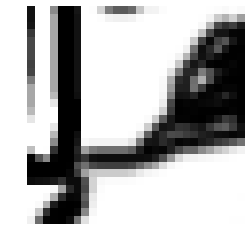

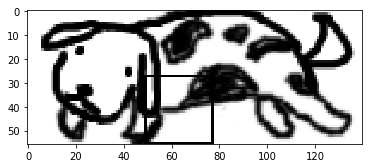

47
25


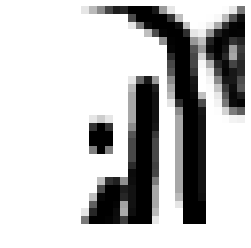

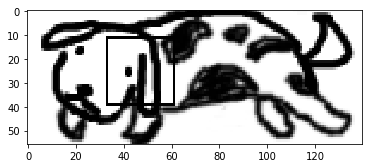

116
19


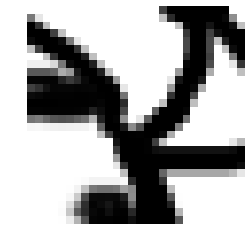

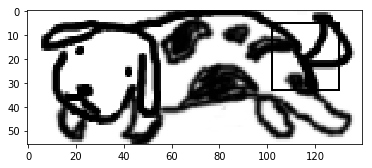

63
32


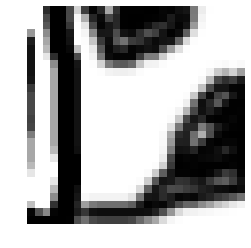

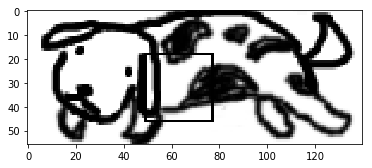

60
21


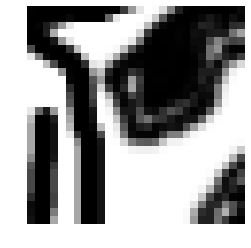

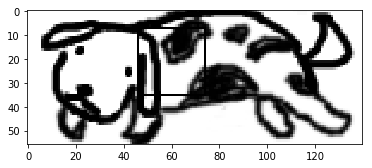

122
43


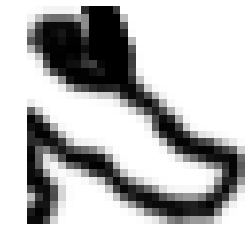

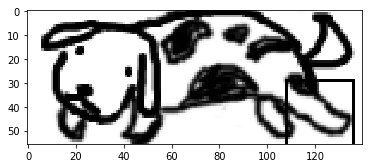

32
46


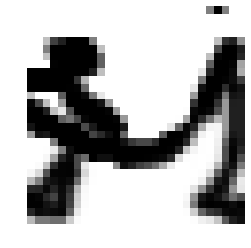

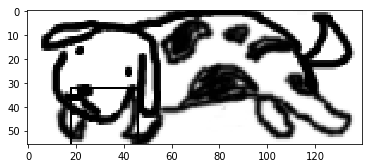

87
44


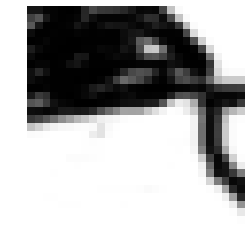

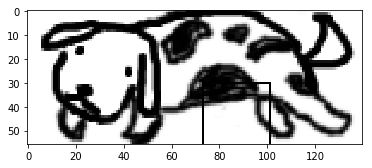

48
37


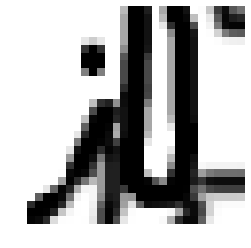

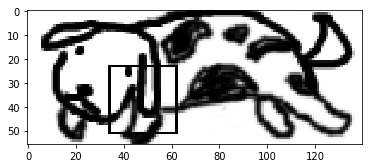

73
29


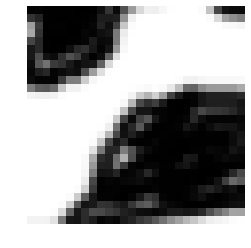

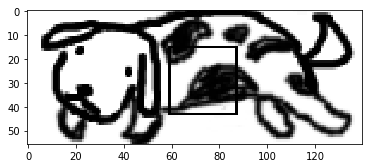

In [69]:
# check csv data
with open('inu_train.pickle', mode='rb') as f:
    data = pickle.load(f)
#print(data[0:3][0])
#print(data[0][1].shape)

datanum = 10
for t in range(datanum):
    dispTrainData(original_img, data[t][0], data[t][1])